In [201]:
import pandas as pd
import sqlite3
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import jieba
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

conn = sqlite3.connect('../sqlite3/qq.db')
cur = conn.cursor()

cur.execute('select * from message')
messages = pd.DataFrame(list(cur.fetchall()))

分词

In [202]:
words = []
def handle(matched):
    return ''
for message in messages.values:
    words.append(re.sub('\[CQ.*?]', handle, message[5]))

tf-idf

In [203]:
# 1000 个特征
vectorizer = CountVectorizer(max_features=1000)
tf_idf_transformer = TfidfTransformer()
tfidf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(words))
print(vectorizer.get_feature_names())

['00', '0点', '0点19', '0点开始', '10', '100', '1002647525', '101', '10瓶', '11', '114514', '11多发言捡到宝的机率更大', '12', '1225290784', '1251316161', '12多发言捡到宝的机率更大', '13', '13多发言捡到宝的机率更大', '14', '14多发言捡到宝的机率更大', '15', '15多发言捡到宝的机率更大', '16', '16多发言捡到宝的机率更大', '17', '17多发言捡到宝的机率更大', '18', '1803945637', '18多发言捡到宝的机率更大', '19', '1939495806', '19多发言捡到宝的机率更大', '1t', '20', '2077', '21', '211', '213531329', '22', '229分', '2313909270', '24', '24盒', '25', '2506984707', '255', '26', '2629557192', '2684319877', '27', '28', '29', '2983', '2983868301', '2984', '2985', '2995', '29元', '2件', '2多发言捡到宝的机率更大', '2瓶', '2袋', '30', '3000', '3002', '3060', '3068640860', '3151292466', '32', '34', '36', '38', '38分', '39', '3件', '415', '418', '423', '433', '436', '44', '446', '457', '461', '49', '49元', '500g', '516', '542', '59', '5d', '5ijyrbnz', '5元', '5多发言捡到宝的机率更大', '5袋', '617670339', '66', '661', '666', '69元', '6元', '6多发言捡到宝的机率更大', '70', '7多发言捡到宝的机率更大', '81', '83', '88', '8元', '8瓶', '90', '91', '912089894', '93', '98', '98

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


K-means 聚类

k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
k = 20
k = 21
k = 22
k = 23
k = 24
k = 25
k = 26
k = 27
k = 28
k = 29
k = 30
k = 31
k = 32
k = 33
k = 34
k = 35
k = 36
k = 37
k = 38
k = 39
k = 40
k = 41
k = 42
k = 43
k = 44
k = 45
k = 46
k = 47
k = 48
k = 49


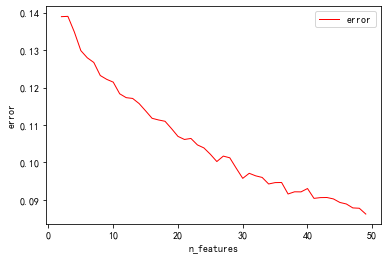

In [204]:
def test_k():
    ks = []
    scores = []
    for i in range(2, 50):
        print(f'k = {i}')
        kmean = KMeans(n_clusters=i, init='k-means++')
        kmean.fit(tfidf)
        km.predict(tfidf)
        s = -km.score(tfidf) / len(words)
        scores.append(s)
        ks.append(i)

    plt.plot(ks, scores, label="error", color="red", linewidth=1)
    plt.xlabel("n_features") # K值
    plt.ylabel("error")
    plt.legend()
    plt.show()
# test_k()

In [207]:
km = KMeans(n_clusters=25, init='k-means++')
km.fit(tfidf)
km.predict(tfidf)
score = -km.score(tfidf) / len(words)
print(score)
messages['cluster'] = km.labels_
messages.sort_values(by='cluster', ascending=False)

0.10273521746561252


,0,1,2,3,4,5,6,cluster
1280,-1427947998,15384,745864592,3187485951,0,是的,1670777772,24
14763,137455757,1353057,45855966,2474133695,0,"[CQ:reply,id=2134267931][CQ:at,qq=598403547] [...",1671366869,24
28179,1013664977,1356257,45855966,2932147372,0,是的,1671519978,24
20873,-281904885,178922,1025084354,1169906528,0,是的,1671443032,24
20308,1112280516,178654,1025084354,348366534,0,是的，共有的就不会写了,1671440850,24
...,...,...,...,...,...,...,...,...
17255,-567776993,2107869,768887710,3323077879,0,"[CQ:reply,id=-1456514679][CQ:at,qq=2761313142]...",1671425406,0
17252,965755928,2107867,768887710,1064988363,0,/follow nonebot,1671425400,0
17251,1318548622,2107866,768887710,2761313142,0,用户 Well2333 starred 仓库 nonebot/nonebot2 (共计 29...,1671425398,0
17250,-677501644,2107865,768887710,3323077879,0,nonebot/nonebot2,1671425396,0
